In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as alg

In [412]:
df = pd.read_csv("MNIST5.csv",header=None)

In [413]:
cov = np.cov(df.transpose())
eigvals, eigvecs = alg.eigh(cov)

In [414]:
eg = eigvals[-100:][::-1]

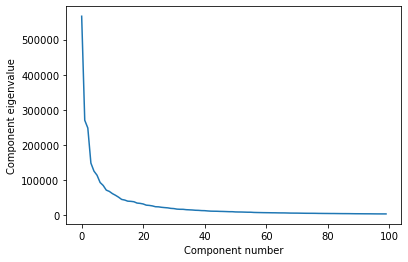

In [415]:
plt.plot(eg)
plt.xlabel("Component number")
plt.ylabel("Component eigenvalue")
plt.savefig("3a.png")

In [339]:
eg = eigvecs[-4:]
eigims = []
for vec in eg:
    eigims.append(np.reshape(vec, (28,28)))

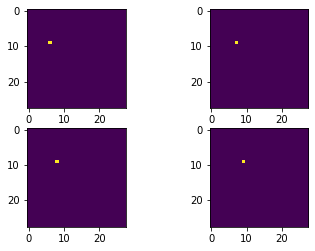

In [340]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(eigims[0])
ax[0,1].imshow(eigims[1])
ax[1,0].imshow(eigims[2])
ax[1,1].imshow(eigims[3])
plt.savefig("3b.png")

In [341]:
df1 = np.asarray(df.iloc[0])
im1 = np.reshape(df1, (28,28)).transpose()

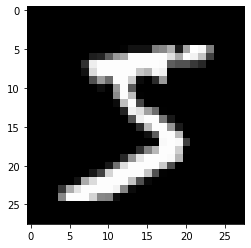

In [344]:
plt.imshow(im1, cmap='gray')
plt.savefig("3c-og.png")

In [408]:
evs = eigvecs[::-1]
ks = [1, 10, 50, 250, 784, 0]
ims = []
for k in ks:
    basis = np.zeros(784)
    for i in range(k):
        basis = np.add(basis, evs[i])
    proj = basis * df1
    im = np.reshape(proj, (28,28)).transpose()
    ims.append(im)

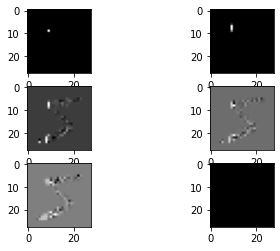

In [410]:
fig, ax = plt.subplots(3,2)
ax[0,0].imshow(ims[0], cmap='gray')
ax[0,1].imshow(ims[1], cmap='gray')
ax[1,0].imshow(ims[2], cmap='gray')
ax[1,1].imshow(ims[3], cmap='gray')
ax[2,0].imshow(ims[4], cmap='gray')
ax[2,1].imshow(ims[5], cmap='gray')
plt.savefig("3c-compress.png")

AdaBoost

In [42]:
adf = pd.read_csv("AdaBoost_data.csv",header=None)
X = adf[[0,1]]
y = adf[2]

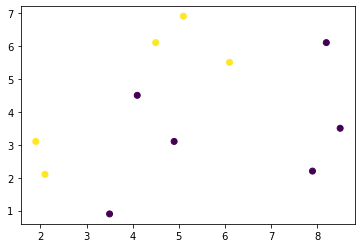

In [43]:
plt.scatter(ada[0],ada[1],c=ada[2])
plt.savefig("6a.png")

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.base import BaseEstimator

In [45]:
class signEstimator(BaseEstimator):
    def __init__(self, t=1, k=1, s=1):
        self.k = k
        self.s = s

    def fit(self, X, y=None):
        pass

    def _meaning(self, x):
        h = self.s * (x - self.t)
        return (1 if h > 0 else -1)

    def predict(self, X):
        return([self._meaning(x) for x in X])